# Visualization example with geopandas

data files for Siwss lakes available at: https://github.com/ZHB/switzerland-geojson/blob/master/README.md


## Import of GPS and speed time series data 

created via a ESP32-powered board with Circuitpython

![image](https://nico.nexgate.ch/images/iot/lyligo_overview.png)

The data was collected around Thalwil, ZH

47.2949° N, 8.5645° E

In [1]:
import pandas as pd

# Load the data from the CSV file into a dataframe
df = pd.read_csv('../data/lis_Boat.csv', sep='#')


df['dt'] = pd.to_datetime(df['dt'])
# Display the dataframe
df.head(20)


,dt,longitude,latitude,speed,boat
0,2023-11-05 14:48:39,8.57206,47.2942,1.67,Lis_test_A
1,2023-11-05 14:48:55,8.57217,47.2942,2.22,Lis_test_A
2,2023-11-05 14:49:10,8.57223,47.2941,3.15,Lis_test_A
3,2023-11-05 14:49:26,8.57238,47.2940,2.96,Lis_test_A
4,2024-02-03 11:16:44,8.56913,47.2943,0.00,Lis_test_B
5,2024-02-03 11:17:18,8.56914,47.2944,0.00,Lis_test_B
6,2024-02-03 11:17:42,8.56916,47.2944,0.00,Lis_test_B
7,2024-02-03 11:18:07,8.56915,47.2945,0.00,Lis_test_B
8,2024-02-03 12:17:02,8.53922,47.3190,9.26,Lis_test_B
9,2024-02-03 14:52:42,8.53962,47.3171,12.59,Lis_test_B


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dt         114 non-null    datetime64[ns]
 1   longitude  114 non-null    float64       
 2   latitude   114 non-null    float64       
 3   speed      114 non-null    float64       
 4   boat       114 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 4.6+ KB


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


ModuleNotFoundError: No module named 'geopandas'

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoSeries from df
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
boat_geo_series = gpd.GeoSeries(geometry)

# Print the GeoSeries
print(boat_geo_series)

0      POINT (8.57206 47.29420)
1      POINT (8.57217 47.29420)
2      POINT (8.57223 47.29410)
3      POINT (8.57238 47.29400)
4      POINT (8.56913 47.29430)
                 ...           
109    POINT (8.59210 47.28820)
110    POINT (8.59241 47.28810)
111    POINT (8.59259 47.28800)
112    POINT (8.59287 47.28800)
113    POINT (8.59320 47.28810)
Length: 114, dtype: geometry


(47.28, 47.31)

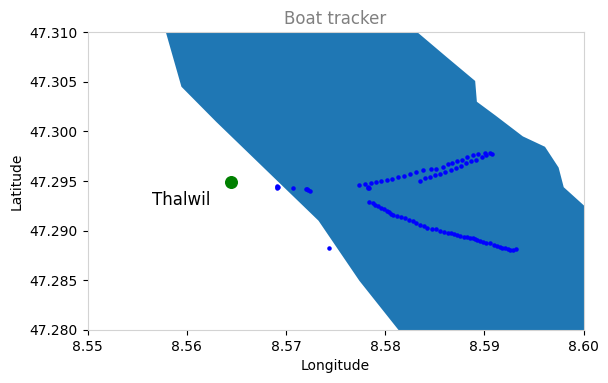

In [ ]:
# Plot Earthquakes from the catalog
gdf = gpd.read_file('../data/lake-zurich.geojson') 
# Plot the map
ax = gdf.plot()

# Coordinates of thalwil (WGS84)
cities = gpd.GeoSeries(
 [Point(8.5645,47.2949)], crs="EPSG:4326" )

# Transform the coordinates to LV95
cities = cities.to_crs( gdf.crs )


# Plot the points
cities.plot( ax=ax, color="green", markersize=70 )

boat_geo_series.plot(ax=ax, color="blue", markersize=5)


ax.annotate('Thalwil', xy=(8.5645,47.2949), 
             xytext=(8.5565,47.2926),
             fontsize=12)

# Remove axes and margins
ax.margins( 0 )

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Boat tracker', fontdict={ 'color': 'grey'})

ax.spines['top'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')

ax.set_xlim([8.55, 8.6])
ax.set_ylim([47.28, 47.31])

